# Ontario Covid Dataset

#### Submitted by ASHISH SHARMA 500188494
#### We will discuss understanding data and getting insights.

#### Dataset Source:https://data.ontario.ca/dataset/ontario-covid-19-outbreaks-data/resource/36048cc1-3c47-48ff-a49f-8c7840e32cc2


In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading  Dataset

In [3]:
# Read_csv will read csv files 

outbreak_data = pd.read_csv('ongoing_outbreaks_phu.csv')

In [5]:
# Getting  information related to your dataset and typeof datatype/

outbreak_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25682 entries, 0 to 25681
Data columns (total 5 columns):
date                        25682 non-null object
phu_name                    25682 non-null object
phu_num                     25682 non-null int64
outbreak_group              25682 non-null object
number_ongoing_outbreaks    25682 non-null int64
dtypes: int64(2), object(3)
memory usage: 1003.3+ KB


In [9]:
#Renaming the columns which are generic
outbreak_data.rename(columns = {'number_ongoing_outbreaks':'TotalCases'}, inplace = True)
outbreak_data.rename(columns = {'phu_name':'City'}, inplace = True)

In [10]:
#head function will print the top 5 records
outbreak_data.head()

,date,City,phu_num,outbreak_group,TotalCases
0,2020-11-01,BRANT COUNTY,2227,4 Workplace,1
1,2020-11-01,BRANT COUNTY,2227,1 Congregate Care,2
2,2020-11-01,CHATHAM-KENT,2240,5 Recreational,1
3,2020-11-01,CHATHAM-KENT,2240,6 Other/Unknown,1
4,2020-11-01,CHATHAM-KENT,2240,4 Workplace,1


In [11]:

#Describe function
outbreak_data.describe()

,phu_num,TotalCases
count,25682.000000,25682.000000
mean,2466.006580,6.288996
std,680.605949,10.778658
min,2226.000000,1.000000
25%,2238.000000,1.000000
50%,2253.000000,2.000000
75%,2265.000000,6.000000
max,5183.000000,123.000000


In [12]:
outbreak_data.columns

Index(['date', 'City', 'phu_num', 'outbreak_group', 'TotalCases'], dtype='object')

In [13]:
# Checking for null values

total = outbreak_data.isnull().sum().sort_values(ascending = False)
percent_1 = outbreak_data.isnull().sum()/outbreak_data.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
TotalCases,0,0.0
outbreak_group,0,0.0
phu_num,0,0.0
City,0,0.0
date,0,0.0


As we can see that, there is no null values in these columns so we dont need to perform data cleaning.

### Data Insights using Pandas

### Q1) How many number of cases are in Ontario?

In [16]:
total_cases = outbreak_data['TotalCases'].sum()
print("Total Cases in Ontario:",total_cases)

Total Cases in Ontario: 161514


###  Q2) Display total number of cases city wise.

In [20]:
outbreak_data_new = outbreak_data[['City','TotalCases']]
total_citywise_data = outbreak_data_new.groupby('City').sum()
#sort_Values will sort our data cases so that we can extract maximum and minimum number of cases
outbreak_data_sorted_data = total_citywise_data.sort_values(['TotalCases'],ascending=False)
outbreak_data_sorted_data

,TotalCases
City,
TORONTO,30828
PEEL REGION,28965
YORK REGION,19651
DURHAM REGION,8000
CITY OF OTTAWA,7816
CITY OF HAMILTON,6819
HALTON REGION,6588
MIDDLESEX-LONDON,6193
NIAGARA REGION,6156


### Q4) Which city has minimum number of outbreaks till now?

In [22]:
#Tail will print the lowest cases from down
outbreak_data_sorted_data.tail(1)

,TotalCases
City,
NORTH BAY PARRY SOUND DISTRICT,190


### Q5) Which city has maximum number of outbreaks till now?

In [23]:
outbreak_data_sorted_data.head(1)

,TotalCases
City,
TORONTO,30828


### Q6) Name top 5 cities which are having highest outbreaks.

In [24]:
#head function will extract top 5 records
top_5 = outbreak_data_sorted_data.head(5)
top_5

,TotalCases
City,
TORONTO,30828
PEEL REGION,28965
YORK REGION,19651
DURHAM REGION,8000
CITY OF OTTAWA,7816


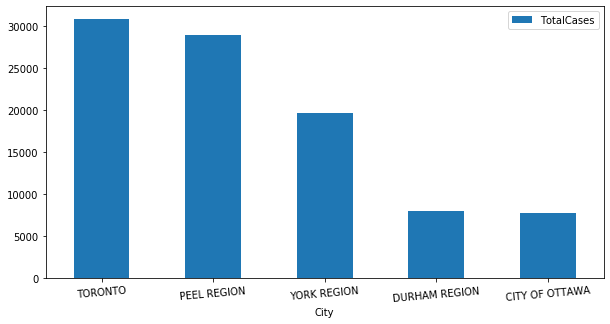

In [25]:
# Displaying top 5 regionwise data
top_5.plot(y="TotalCases", kind="bar", rot=5, fontsize=10,figsize=(10, 5))

In [26]:
# Separting month and year from date
outbreak_data['year'] = pd.DatetimeIndex(outbreak_data['date']).year
outbreak_data['month'] = pd.DatetimeIndex(outbreak_data['date']).month

###  Q7) How much Cases occurred every year ?

In [28]:

#Group by year and than we will sum total number of cases
total_yearwise_data = outbreak_data.groupby(['year']).sum()[['TotalCases']]
total_yearwise_data

,TotalCases
year,
2020,45087
2021,116427


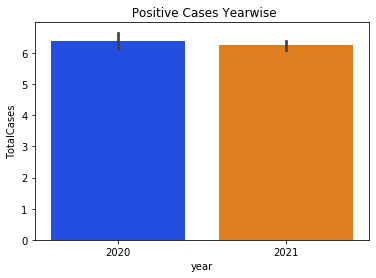

In [52]:
# Displaying yearwise positive cases
sns.barplot(x = 'year',y = 'TotalCases',data = outbreak_data, palette = "bright")
plt.title(" Positive Cases Yearwise")
plt.show()

###  Q8) Display year and monthwise covid cases ?

In [30]:
import calendar
outbreak_data['month_name'] = outbreak_data['month'].apply(lambda x: calendar.month_abbr[x])

In [31]:
total_monthwise_data = outbreak_data.groupby(['year','month','month_name']).sum()[['TotalCases']]
total_monthwise_data

TotalCases
year month month_name            
2020 11    Nov              18066
     12    Dec              27021
2021 1     Jan              32170
     2     Feb              19611
     3     Mar              18072
     4     Apr              23984
     5     May              19146
     6     Jun               3444

In [32]:
# Filtering Data for Year 2020
outbreak_data_2020 = outbreak_data[outbreak_data.year == 2020]
outbreak_data_2020.head()

,date,City,phu_num,outbreak_group,TotalCases,year,month,month_name
0,2020-11-01,BRANT COUNTY,2227,4 Workplace,1,2020,11,Nov
1,2020-11-01,BRANT COUNTY,2227,1 Congregate Care,2,2020,11,Nov
2,2020-11-01,CHATHAM-KENT,2240,5 Recreational,1,2020,11,Nov
3,2020-11-01,CHATHAM-KENT,2240,6 Other/Unknown,1,2020,11,Nov
4,2020-11-01,CHATHAM-KENT,2240,4 Workplace,1,2020,11,Nov


In [34]:
# Filtering Data for Year 2021
outbreak_data_2021 = outbreak_data[outbreak_data.year == 2021]
outbreak_data_2021.head()

,date,City,phu_num,outbreak_group,TotalCases,year,month,month_name
7055,2021-01-01,BRANT COUNTY,2227,4 Workplace,4,2021,1,Jan
7056,2021-01-01,BRANT COUNTY,2227,3 Education,4,2021,1,Jan
7057,2021-01-01,BRANT COUNTY,2227,1 Congregate Care,5,2021,1,Jan
7058,2021-01-01,CHATHAM-KENT,2240,4 Workplace,4,2021,1,Jan
7059,2021-01-01,CHATHAM-KENT,2240,5 Recreational,1,2021,1,Jan


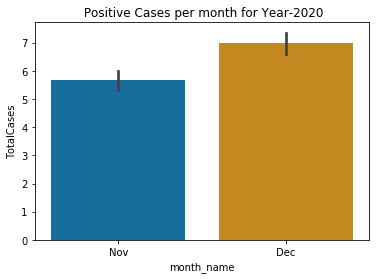

In [54]:
# Displaying monthwise positive cases 2020
sns.barplot(x = 'month_name',y = 'TotalCases',data = outbreak_data_2020, palette = "colorblind")
plt.title(" Positive Cases per month for Year-2020")
plt.show()

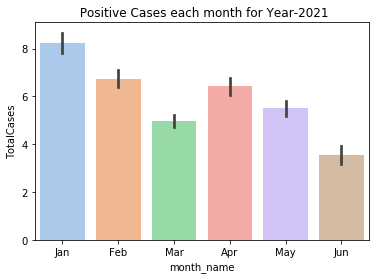

In [58]:
# Displaying monthwise positive cases 2021
sns.barplot(x = 'month_name',y = 'TotalCases',data = outbreak_data_2021, palette = "pastel")
plt.title(" Positive Cases each month for Year-2021")
plt.show()